<a href="https://colab.research.google.com/github/Rida1-bot/Brain-Abnormal-Cell-Detection/blob/main/vg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_name = "./gdrive/MyDrive/data"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


>> The **OS** module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc. You first need to import the os module to interact with the underlying operating system.

>>**Numpy** provides a multidimensional array object, as well as variations such as masks and matrices, which can be used for various math operations.

>> **Matplotlib** is used for data visualization

>>**ImageDataGenerator** class provides a quick and easy way to augment your images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change.

>>**glob** is used to return all file paths that match a specific pattern. We can use glob to search for a specific file pattern

In [ ]:
import os
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import metrics 
from keras import losses 
from matplotlib.pyplot import imshow
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, Lambda
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from glob import glob

In [ ]:
pip install split-folders

**Seeds** can be any integers (sometimes also floats or byte-like objects) that ensure that if you randomly sample data you can get exactly the same sample each time for repeatability

In [ ]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/data", output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) 

Copying files: 3000 files [00:50, 59.98 files/s] 


In [ ]:
#Resizing image
IMAGE_SIZE =[224,224]

valid_path='/content/output/val'
train_path='content/output/train'

**Flatten** function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network model, then pass those data into every single neuron of the model effectively.

A **Dense** layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer. It's the most basic layer in neural networks.

In [ ]:
#Adding preprocessing layer in front of VGG
vgg = vgg16.VGG16(input_shape=IMAGE_SIZE +[3], include_top = False, weights = "imagenet")

#Don't train existing weights
for layers in vgg.layers:
  layers.trainable=False

# Useful for getting number of classes
folders=glob('output/train/*')

# Our layer
x = Flatten()(vgg.output)
x= Dense(len(folders), activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# Create model object
model=Model(inputs=vgg.input,outputs=prediction)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Use image Data Generator to inport images from dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/output/val',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


The **loss** function in a neural network quantifies the difference between the expected outcome and the outcome produced by the machine learning model. From the loss function, we can derive the gradients which are used to update the weights.

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
75/75 [==============================] - 36s 476ms/step - loss: 0.5923 - accuracy: 0.7246 - val_loss: 0.4989 - val_accuracy: 0.8967
Epoch 2/15
75/75 [==============================] - 36s 476ms/step - loss: 0.4619 - accuracy: 0.8587 - val_loss: 0.4136 - val_accuracy: 0.9233
Epoch 3/15
75/75 [==============================] - 36s 473ms/step - loss: 0.3863 - accuracy: 0.9179 - val_loss: 0.3571 - val_accuracy: 0.9467
Epoch 4/15
75/75 [==============================] - 35s 470ms/step - loss: 0.3294 - accuracy: 0.9450 - val_loss: 0.3245 - val_accuracy: 0.9417
Epoch 5/15
75/75 [==============================] - 35s 470ms/step - loss: 0.2974 - accuracy: 0.9496 - val_loss: 0.2992 - val_accuracy: 0.9550
Epoch 6/15
75/75 [==============================] - 35s 472ms/step - loss: 0.2643 - accuracy: 0.9621 - val_loss: 0.2717 - val_accuracy: 0.9567
Epoch 7/15
75/75 [==============================] - 36s 473ms/step - loss: 0.2263 - accuracy: 0.9750 - val_loss: 0.2552 - val_accuracy: 0.9533

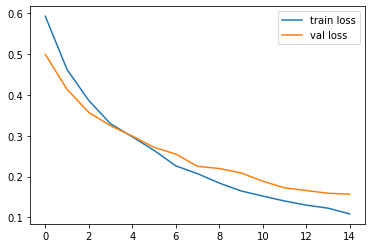

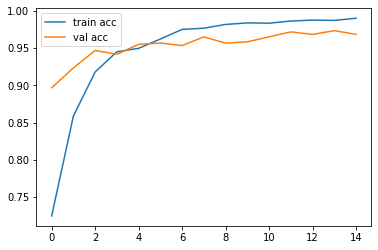

<Figure size 432x288 with 0 Axes>

In [ ]:
# Fit the model
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=15,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

#Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('lossVal_loss')

#Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('./drive/MyDrive/model1_vgg.h5')